# We have to make sure that these general packeages are installed before we start working on the exam So this is always going to be Step 1
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [ ]:
import numpy as np
import scipy.stats as stats 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns sns.set_style('whitegrid')
from sklearn import linear_model from sklearn.metrics import mean_squared_error
%matplotlib inline %config InlineBackend.figure_format ='retina'



# Ridge, Lasso and ElasticNet

All three models are used to deal with multicollienarity between independent variables which the linear regression fails to deal with.

## Ridge

The goal is to find optimal value of "alpha" which is the penalty term : we do it by using "RidgeCV"


# We need the following things for running the Ridge,Lasso and ElasticNet regression:
Step 1

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

# Step 2 : Creating train and test data

In [ ]:
#If we read data from a csv or excel we need to define y and x
y = df.Salary
# Drop the column with the independent variable (Salary), and columns for which we created dummy 
X_ = df.drop(['x4', 'x5', 'x6'], axis=1).astype('float64')
# Define the feature set X.
X = pd.concat([X_,[['x1', 'x2', 'x3']]], axis=1)

In [ ]:
## Train test split 70/30
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Print shapes of X(s) and y(s)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

# Step 3: Obtaining optimal Alpha and fitting it to the train data

In [63]:
#Here we are defining ridge alphas as an array 
#logspace computes its start and end points as base**start and base**stop respectively. 
#The base value can be specified, but is 10.0 by default.

ridge_alphas = np.logspace(0, 5, 200)

#We use RidgeCV to find the optimal alpha (regularization stregth)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10) #cv stands for cross validation
optimal_ridge.fit(X_train, y_train)

#Printing the alpha value
print (optimal_ridge.alpha_)

821.434358492


cv : int, cross-validation generator or an iterable, optional
Determines the cross-validation splitting strategy. Possible inputs for cv are:
None, to use the efficient Leave-One-Out cross-validation
integer, to specify the number of folds.
An object to be used as a cross-validation generator.
An iterable yielding train/test splits.
Cross-validate the Ridge $R^2$ with the optimal alpha.

# Step 4: Using the optimal alpha to carryout cross validation and check the R^2

In [64]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores)) #mean score of 10 cross validations as specified above

[ 0.0506686   0.16873056  0.12518106  0.08784334  0.05568538  0.0600352
  0.15315871  0.08627918  0.14303996  0.127982  ]
0.105860399596


The Scores here refer to R^2

#  Step 5 Fitting the model - this does not give the output

In [ ]:
ridge.fit(X_train, y_train)

# Step 6: Obtaining residuals
Residuals: we are predicting y by using X-test sample and deducting the predicted y from actual Y values in 
test sample to get residuals

In [ ]:
ridge_resid = y_test - ridge.predict(X_test)

# Lasso: we already have installed the packages

We have to repeat the steps till splitting the data set in train and test as before if its not asked in tandom with Ridge

### Find an optimal value for Lasso regression alpha using LassoCV

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

* Hint: again, once the LassoCV is fit, the attribute .alpha_ contains the best alpha parameter it found through cross-validation.
* Lasso, unlike Ridge, performs best searching alphas through linear space (np.linspace). However, you can actually let the LassoCV decide itself what alphas to use by instead setting the keyword argument n_alphas= to however many alphas you want it to search over.

In [65]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X2train, y2train)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0042158196794


..........................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


Cross-validate the Lasso $R^2$ with the optimal alpha

In [66]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X2train, y2train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[ 0.04142566  0.18439454  0.10692433  0.0851568   0.03937662  0.03995398
  0.16134064  0.09078598  0.1541439   0.12969258]
0.103319502421


* The lasso performs slightly better than the Ridge, but similarly.
* Lasso deals primarily with the feature selection of valuable variables, eliminating ones that are not useful. This also takes care of multicollinearity, but in a different way: it will choose the "best" of the correlated variablesand zero-out the other redundant ones.

* There may also be useless variables in the data which it is simply getting rid of entirely.

#### Look at the coefficients for variables in the Lasso.

In [67]:
lasso.fit(X2train, y2train)

Lasso(alpha=0.0042158196794048561, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
lasso_coefs = pd.DataFrame({'variable':X2.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
77,0.323189,0.323189,stud_age
76,0.133609,-0.133609,experience_2
71,0.106763,-0.106763,C(marital_status)[T.SOLTERO]
41,0.079399,0.079399,C(country_study)[T.CUBA]
24,0.066975,0.066975,C(prov_resid)[T.PICHINCHA]
31,0.064972,-0.064972,C(country_study)[T.AUSTRALIA]
45,0.060849,0.060849,C(country_study)[T.u'ESPA\xd1A']
65,0.058456,-0.058456,C(country_study)[T.SUECIA]
0,0.044682,0.044682,C(gender)[HOMBRE]
48,0.041704,-0.041704,C(country_study)[T.u'Espa\xf1a']


In [69]:
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X2train.shape[0]))

('Percent variables zeroed out:', 0.009433962264150943)


## Find an optimal value for Elastic Net regression alpha using ElasticNetCV

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html


Note here that you will be optimizing both the alpha parameter and the l1_ratio:
*  alpha: strength of regularization
*  l1_ratio: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)

* Do not include 0 in the search for l1_ratio: it will not allow it and break!
* You can use n_alphas for the alpha parameters instead of setting your own values: highly recommended!
* Also - be careful setting too many l1_ratios over cross-validation folds in your search. It can take a very long time if you choose too many combinations and for the most part there are diminishing returns in this data.

In [70]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10, verbose=1)
optimal_enet.fit(X2train, y2train)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.345350924907
0.01


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   34.8s finished


Cross-validate the ElasticNet $R^2$ with the optimal alpha and l1_ratio.
* This is another way to look at the performance of your model.
* The tighter the distribution of residuals around zero, the better your model has performed!


In [71]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X2train, y2train, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[ 0.05116014  0.16918225  0.12179132  0.08730277  0.05382029  0.05709034
  0.15522874  0.08441181  0.14572066  0.12808249]
0.105379081536


## Plot the residuals for the ridge, lasso, and elastic net on histograms

In [72]:
## Fit
ridge.fit(X2train, y2train)
enet.fit(X2train, y2train)
lasso.fit(X2train, y2train)

Lasso(alpha=0.0042158196794048561, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
# residuals:
ridge_resid = y2test - ridge.predict(X2test)
lasso_resid = y2test - lasso.predict(X2test)
enet_resid = y2test - enet.predict(X2test)

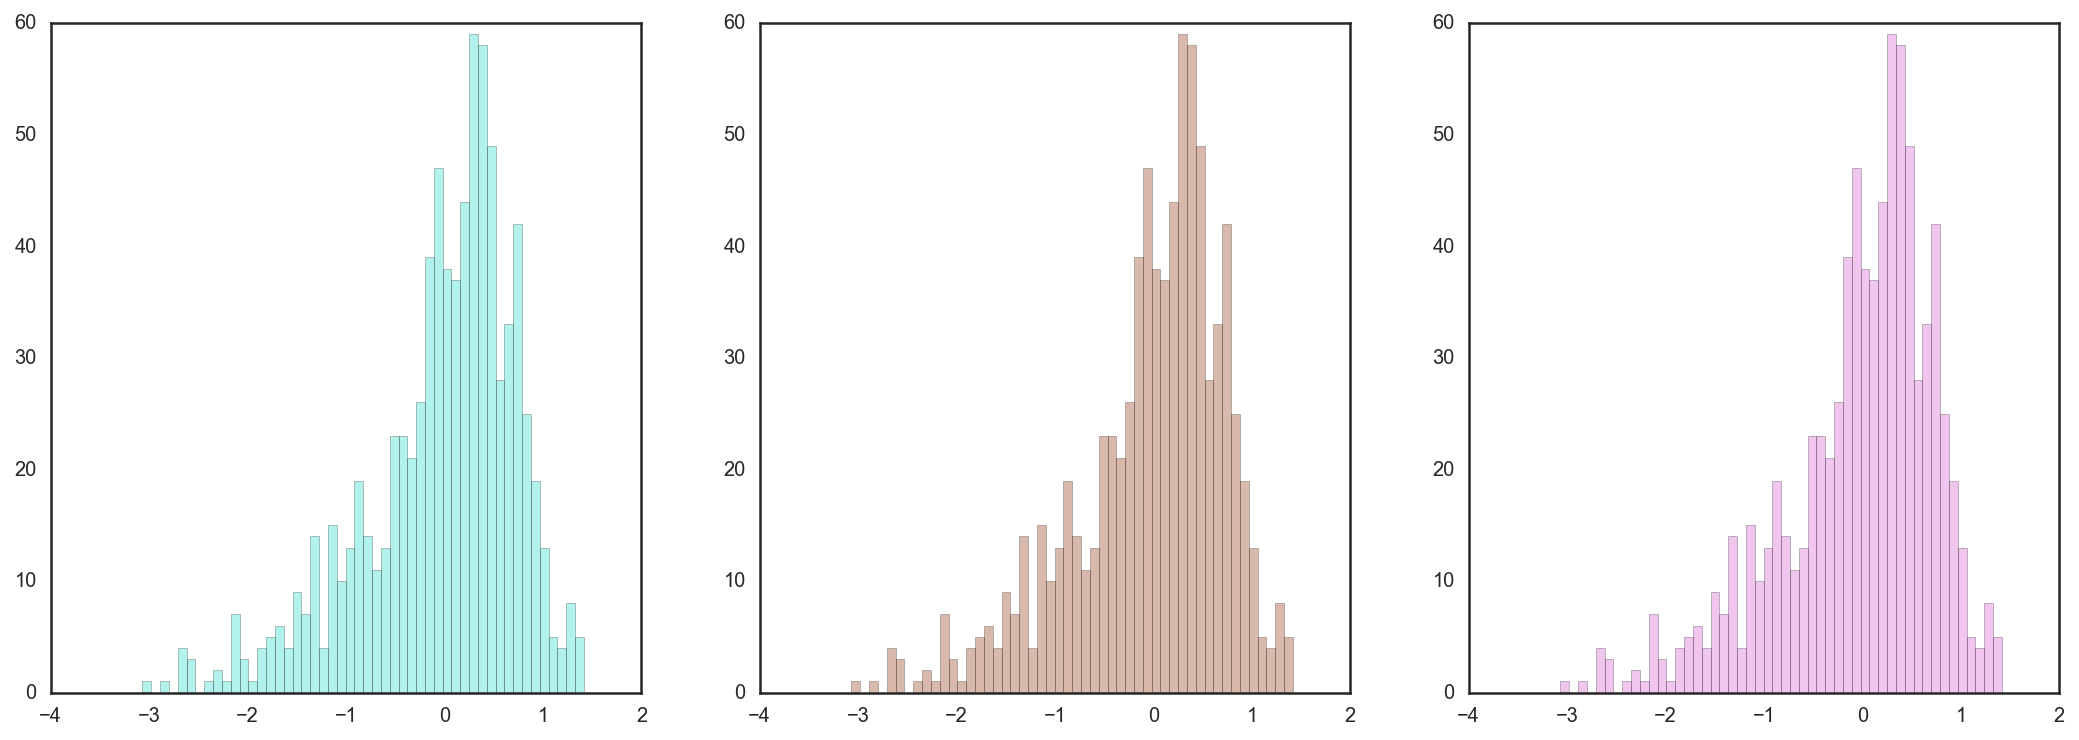

In [74]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='turquoise', ax=axarr[0], label='Ridge residuals')

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='sienna', ax=axarr[1], label='Lasso residuals')

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='orchid', ax=axarr[2], label='ElasticNet residuals')

plt.show()

 Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. If you’ve heard of them before, you must know that they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

#Ridge Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)
#Lasso Regression:
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

Ridge Regression

As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.
I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression. By how much? We’ll find out soon. Leaving the mathematical details for later, lets see ridge regression in action on the same problem as above.

Lasso Regression

LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

α = 0: Same coefficients as simple linear regression
α = ∞: All coefficients zero (same logic as before)
0 < α < ∞: coefficients between 0 and that of simple linear regression

Key Difference

Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.
Lasso: Along with shrinking coefficients, lasso performs feature selection as well. (Remember the ‘selection‘ in the lasso full-form?) As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.
Traditionally, techniques like stepwise regression were used to perform feature selection and make parsimonious models. But with advancements in Machine Learning, ridge and lasso regression provide very good alternatives as they give much better output, require fewer tuning parameters and can be automated to a large extend.